In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
#Let's read the data
df = pd.read_csv('inc_occ_gender.csv', na_values = 'Na')

In [3]:
df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
4,Legislators,8,NaN,5,NaN,4,NaN


In [4]:
df.shape

(558, 7)

In [5]:
df.count()

Occupation     558
All_workers    558
All_weekly     322
M_workers      558
M_weekly       232
F_workers      558
F_weekly       192
dtype: int64

In [6]:
df.isnull().sum()

Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64

In [7]:
#Need to drop all NaN values since they will contribute nothing to the analysis
df = df.dropna().reset_index(drop=True) #Drop = True term drops the old index column and replaces it with a new one

In [8]:
df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
4,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0


In [9]:
df.isnull().sum()

Occupation     0
All_workers    0
All_weekly     0
M_workers      0
M_weekly       0
F_workers      0
F_weekly       0
dtype: int64

In [10]:
#No more null values!
#We should also have a different size data frame, obviously
df.shape

(142, 7)

In [11]:
#Now I'm going to make a dataframe with the specific job sectors, the ones in all caps

sectors = []

for i in range(df.count()['Occupation']):
    x = df['Occupation'][i]
    if x.isupper():
        sectors.append(x)
   

In [12]:
sectors

['ALL OCCUPATIONS',
 'MANAGEMENT',
 'BUSINESS',
 'COMPUTATIONAL',
 'ENGINEERING',
 'SCIENCE',
 'SOCIAL SERVICE',
 'LEGAL',
 'EDUCATION',
 'ARTS',
 'HEALTHCARE PROFESSIONAL',
 'HEALTHCARE SUPPORT',
 'PROTECTIVE SERVICE',
 'CULINARY',
 'GROUNDSKEEPING',
 'SERVICE',
 'SALES',
 'OFFICE',
 'AGRICULTURAL',
 'CONSTRUCTION',
 'MAINTENANCE',
 'PRODUCTION',
 'TRANSPORTATION']

In [13]:
#Creating our new data frame with the sectors list and importing all data associated with each sector

data = []

for i in range(df.count()['Occupation']):
    if df['Occupation'][i] in sectors:
        data.append(df.loc[i])

dfsectors = pd.DataFrame(data, columns = df.columns)
dfsectors.reset_index(drop = True)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,BUSINESS,5942,1137.0,2686,1327.0,3256,1004.0
3,COMPUTATIONAL,4009,1428.0,3036,1503.0,973,1245.0
4,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0
5,SCIENCE,1176,1206.0,662,1379.0,514,1067.0
6,SOCIAL SERVICE,2143,889.0,776,973.0,1367,845.0
7,LEGAL,1346,1391.0,624,1877.0,722,1135.0
8,EDUCATION,6884,956.0,1849,1144.0,5034,907.0
9,ARTS,1643,1001.0,930,1088.0,713,942.0


[Text(0,0.5,'Occupation'),
 (0, 2000),
 Text(0.5,0,'Male Median Weekly Earnings in USD')]

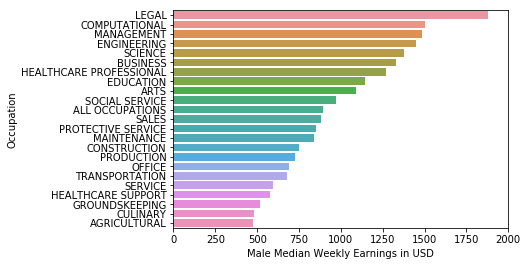

In [14]:
#Data Visualization: Plots of Male and Female Median Weekly Earnings

m_weekly_plot = sns.barplot(x = "M_weekly", y = "Occupation", data = dfsectors.sort_values("M_weekly", ascending = False))
m_weekly_plot.set(xlim = (0,2000), xlabel = "Male Median Weekly Earnings in USD", ylabel = "Occupation" )



[Text(0,0.5,'Occupation'),
 (0, 2000),
 Text(0.5,0,'Female Median Weekly Earnings in USD')]

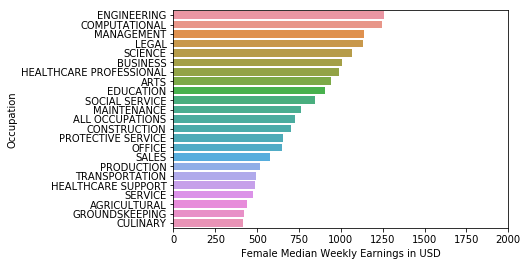

In [15]:
f_weekly_plot = sns.barplot(x = "F_weekly", y = "Occupation", data = dfsectors.sort_values("F_weekly", ascending = False))

f_weekly_plot.set(xlim = (0,2000), xlabel = "Female Median Weekly Earnings in USD", ylabel = "Occupation" )

In [16]:
dfsectors['F/M_weekly'] = dfsectors['F_weekly']/dfsectors['M_weekly']

In [17]:
dfsectors.reset_index(drop = True)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,0.811173
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,0.766487
2,BUSINESS,5942,1137.0,2686,1327.0,3256,1004.0,0.756594
3,COMPUTATIONAL,4009,1428.0,3036,1503.0,973,1245.0,0.828343
4,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0,0.865702
5,SCIENCE,1176,1206.0,662,1379.0,514,1067.0,0.773749
6,SOCIAL SERVICE,2143,889.0,776,973.0,1367,845.0,0.868448
7,LEGAL,1346,1391.0,624,1877.0,722,1135.0,0.604688
8,EDUCATION,6884,956.0,1849,1144.0,5034,907.0,0.792832
9,ARTS,1643,1001.0,930,1088.0,713,942.0,0.865809


[Text(0,0.5,'Occupation'),
 (0, 1),
 Text(0.5,0,'Ratio of Female to Male Median Weekly Earnings in USD')]

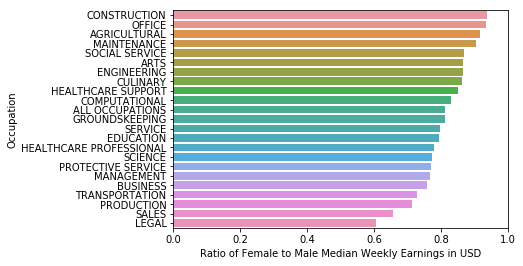

In [18]:
ratio_plot = sns.barplot(x = "F/M_weekly", y = "Occupation", data = dfsectors.sort_values("F/M_weekly", ascending = False))
ratio_plot.set(xlim = (0,1), xlabel = "Ratio of Female to Male Median Weekly Earnings in USD", ylabel = "Occupation")

In [38]:
#So in the most general sense, there seems to be a pay gap, even though number of working hours was not factored into the data.

#Next I would like to look at specific jobs where women make up the overwhelming majority of workers, source is BLS again.

#I will search for 9 occupations from the BLS where women are 90% of the workforce. I'm hoping for the occupations to be in the data and for them to be labled as they are on the BLS website.
for i in range(df.count()['Occupation']):
    if df['Occupation'][i] == 'Registered nurses':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Secretaries and administrative assistants':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Nursing, psychiatric, and home health aides':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Receptionists and information clerks':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Maids and housekeeping cleaners':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Bookkeeping, accounting, and auditing clerks':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Teacher assistants':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Preschool and kindergarten teachers':
        print(i, df['Occupation'][i])
    elif df['Occupation'][i] == 'Licensed practical and lisenced vocational nurses':
        print(i, df['Occupation'][i])

65 Registered nurses
70 Nursing, psychiatric, and home health aides
86 Maids and housekeeping cleaners
106 Bookkeeping, accounting, and auditing clerks
109 Receptionists and information clerks
116 Secretaries and administrative assistants


In [34]:
# it appears we don't have all that we searched for. We can just use the 6 we found.

'Receptionists and information clerks'

In [41]:
womendata = [df.loc[65], df.loc[70], df.loc[86], df.loc[106], df.loc[109], df.loc[116]]

dfwomen = pd.DataFrame(womendata, columns = df.columns)
dfwomen.reset_index(drop = True)



,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,Registered nurses,2382,1116.0,278,1222.0,2104,1098.0
1,"Nursing, psychiatric, and home health aides",1400,467.0,163,526.0,1237,457.0
2,Maids and housekeeping cleaners,876,416.0,134,475.0,742,407.0
3,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0
4,Receptionists and information clerks,852,575.0,72,619.0,781,569.0
5,Secretaries and administrative assistants,2223,687.0,124,786.0,2099,683.0


In [84]:
dfwomen['F/M_weekly'] = df['F_weekly']/df['M_weekly']
dfwomen.reset_index(drop = True)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly
0,Registered nurses,2382,1116.0,278,1222.0,2104,1098.0,0.898527
1,"Nursing, psychiatric, and home health aides",1400,467.0,163,526.0,1237,457.0,0.868821
2,Maids and housekeeping cleaners,876,416.0,134,475.0,742,407.0,0.856842
3,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0,1.002899
4,Receptionists and information clerks,852,575.0,72,619.0,781,569.0,0.919225
5,Secretaries and administrative assistants,2223,687.0,124,786.0,2099,683.0,0.868957


[Text(0,0.5,'Female Dominated Occupations (>90%)'),
 (0, 1.3),
 Text(0.5,0,'Ratio of Female to Male Median Weekly Earnings in USD')]

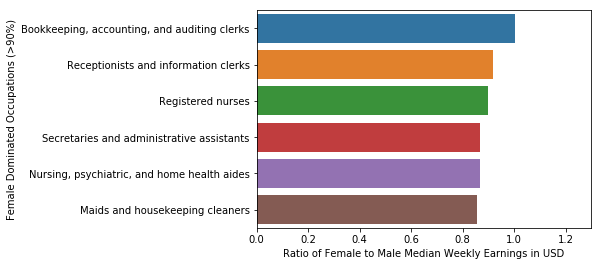

In [48]:
F_ratio_plot = sns.barplot(x = "F/M_weekly", y = "Occupation", data = dfwomen.sort_values("F/M_weekly", ascending = False))
F_ratio_plot.set(xlim = (0,1.3), xlabel = "Ratio of Female to Male Median Weekly Earnings in USD", ylabel = "Female Dominated Occupations (>90%)")

In [56]:
#Let's add a F/M column to our original data set to see possibly where else women may make more

df['F/M_weekly'] = df['F_weekly']/df['M_weekly']
df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,0.811173
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,0.766487
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,0.815637
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,0.743875
4,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,0.784779


In [57]:
for i in range(df.count()['F/M_weekly']):
    if df['F/M_weekly'][i] >=1:
        print(i, df['Occupation'][i])

19 Wholesale and retail buyers, except farm products
73 Police and sheriff's patrol officers
106 Bookkeeping, accounting, and auditing clerks
117 Data entry keyers
119 Office clerks, general


In [63]:
#Creating a new dataframe to contain the information presented above
Womendata = [df.loc[19], df.loc[73], df.loc[106], df.loc[117], df.loc[119]]

dfWomen = pd.DataFrame(Womendata, columns = df.columns)
dfWomen.reset_index(drop = True)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly
0,"Wholesale and retail buyers, except farm products",142,926.0,73,886.0,69,985.0,1.111738
1,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0,1.007992
2,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0,1.002899
3,Data entry keyers,223,619.0,55,589.0,169,638.0,1.083192
4,"Office clerks, general",929,620.0,156,609.0,773,622.0,1.021346


In [66]:
#Adding a column to get the ratio of female to male workers in said fields

dfWomen['F/M_workers'] = dfWomen['F_workers']/dfWomen['M_workers']
dfWomen.reset_index(drop = True)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly,F/M_workers
0,"Wholesale and retail buyers, except farm products",142,926.0,73,886.0,69,985.0,1.111738,0.945205
1,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0,1.007992,0.151142
2,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0,1.002899,7.839080
3,Data entry keyers,223,619.0,55,589.0,169,638.0,1.083192,3.072727
4,"Office clerks, general",929,620.0,156,609.0,773,622.0,1.021346,4.955128


In [71]:
#The really interesting one above is Police officers, where women only make up about 13% of the workforce yet outearn men

#Another thing we can do is to see what specific jobs have the largest wage gaps. Let's also ad a F/M workers column to df

df['F/M_workers'] = df['F_workers']/df['M_workers']
df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly,F/M_workers
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,0.811173,0.795674
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,0.766487,0.701991
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,0.815637,0.370904
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,0.743875,0.325282
4,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,0.784779,0.663158


In [80]:
largegapdata=[]

for i in range(df.count()['F/M_weekly']):
    if df['F/M_weekly'][i] <= .75 and df['Occupation'][i] not in sectors:
        largegapdata.append(df.loc[i])

In [83]:
dflarge = pd.DataFrame(largegapdata, columns = df.columns)
dflarge.reset_index(drop = True)
dflarge.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly,F/M_workers
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,0.743875,0.325282
5,Administrative services managers,170,1191.0,96,1451.0,73,981.0,0.676085,0.760417
7,Financial managers,1124,1408.0,551,1732.0,573,1130.0,0.652425,1.039927
10,"Transportation, storage, and distribution mana...",276,966.0,224,1006.0,52,749.0,0.744533,0.232143
15,"Property, real estate, and community associati...",401,914.0,171,1137.0,230,823.0,0.723835,1.345029


[Text(0,0.5,'Occupation'),
 (0, 1),
 Text(0.5,0,'Ratio of Female to Male Median Weekly Earnings in USD')]

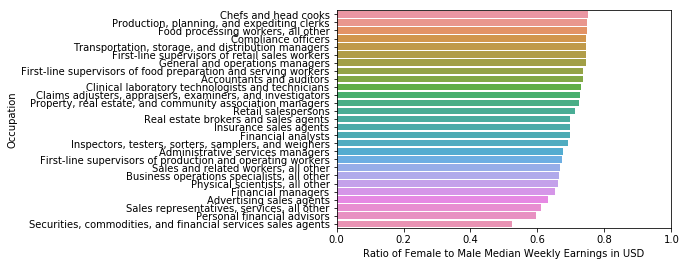

In [82]:
large_ratio_plot = sns.barplot(x = "F/M_weekly", y = "Occupation", data = dflarge.sort_values("F/M_weekly", ascending = False))
large_ratio_plot.set(xlim = (0,1), xlabel = "Ratio of Female to Male Median Weekly Earnings in USD", ylabel = "Occupation")

In [85]:
#The last thing I want to do is to see what industries females outnumber males but yet are outearned by males

df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,F/M_weekly,F/M_workers
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,0.811173,0.795674
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,0.766487,0.701991
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,0.815637,0.370904
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,0.743875,0.325282
4,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,0.784779,0.663158


In [98]:
totalgapdata = []

for i in range(df.count()['F/M_workers']):
    if df['F/M_workers'][i] > 1 and df['F/M_weekly'][i] < 1 and df['Occupation'][i] not in sectors:
        totalgapdata.append(df.loc[i])
        

In [101]:
dftotalgap = pd.DataFrame(totalgapdata, columns = df.columns)
dftotalgap.reset_index(drop = True)
dftotalgap.shape

(54, 9)

In [102]:
#There are 54 professions where women outnumber men but yet are outearned by men